In [135]:
import librosa
import os
import xml.etree.ElementTree as ET
import pandas as pd
from collections import defaultdict
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
import cv2
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [16]:
def extract_features(audio_file):
    """Extracts audio features from a given audio file."""

    y, sr = librosa.load(audio_file)

    # Extract features
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
    centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    rms = np.mean(librosa.feature.rms(y=y))
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)

    # Concatenate features
    features = np.hstack([zcr, centroid, bandwidth, contrast, rolloff, rms, chroma, mfcc])

    return features

In [44]:
sound_dir = '/Users/terryding/Downloads/Audio Training Data for Auditory Feature 2/Car Honk- 1'
fingerprints = []
labels = []
for file_name in os.listdir(sound_dir):
    labels.append([1,0,0,0,0,0,0])
    audio_file_path = os.path.join(sound_dir, file_name)
    
    #audio_file_name = os.path.basename(audio_file_path)
    #filler = audio_file_name.split('-')
    #identifier_num = int(numbers[1])
    #class_label = num_class_mapping[identifier_num]
    #getting the class from the label 
    
    features = extract_features(audio_file_path)
    fingerprints.append(features)

In [52]:
sound_dir = '/Users/terryding/Downloads/Audio Training Data for Auditory Feature 2/Dog Barking- 3'
for file_name in os.listdir(sound_dir):
    labels.append([0,1,0,0,0,0,0])
    audio_file_path = os.path.join(sound_dir, file_name)
    
    #audio_file_name = os.path.basename(audio_file_path)
    #filler = audio_file_name.split('-')
    #identifier_num = int(numbers[1])
    #class_label = num_class_mapping[identifier_num]
    #getting the class from the label 
    
    features = extract_features(audio_file_path)
    fingerprints.append(features)

/opt/anaconda3/envs/week4/lib/python3.8/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [53]:
sound_dir = '/Users/terryding/Downloads/Audio Training Data for Auditory Feature 2/Drilling- 4'
for file_name in os.listdir(sound_dir):
    labels.append([0,0,1,0,0,0,0])
    audio_file_path = os.path.join(sound_dir, file_name)
    
    #audio_file_name = os.path.basename(audio_file_path)
    #filler = audio_file_name.split('-')
    #identifier_num = int(numbers[1])
    #class_label = num_class_mapping[identifier_num]
    #getting the class from the label 
    
    features = extract_features(audio_file_path)
    fingerprints.append(features)

In [54]:
sound_dir = '/Users/terryding/Downloads/Audio Training Data for Auditory Feature 2/Engine Idling- 5'
for file_name in os.listdir(sound_dir):
    labels.append([0,0,0,1,0,0,0])
    audio_file_path = os.path.join(sound_dir, file_name)
    
    #audio_file_name = os.path.basename(audio_file_path)
    #filler = audio_file_name.split('-')
    #identifier_num = int(numbers[1])
    #class_label = num_class_mapping[identifier_num]
    #getting the class from the label 
    
    features = extract_features(audio_file_path)
    fingerprints.append(features)

In [55]:
sound_dir = '/Users/terryding/Downloads/Audio Training Data for Auditory Feature 2/Jackhammer- 7'
for file_name in os.listdir(sound_dir):
    labels.append([0,0,0,0,1,0,0])
    audio_file_path = os.path.join(sound_dir, file_name)
    
    #audio_file_name = os.path.basename(audio_file_path)
    #filler = audio_file_name.split('-')
    #identifier_num = int(numbers[1])
    #class_label = num_class_mapping[identifier_num]
    #getting the class from the label 
    
    features = extract_features(audio_file_path)
    fingerprints.append(features)

In [56]:
sound_dir = '/Users/terryding/Downloads/Audio Training Data for Auditory Feature 2/Siren- 8'
for file_name in os.listdir(sound_dir):
    labels.append([0,0,0,0,0,1,0])
    audio_file_path = os.path.join(sound_dir, file_name)
    
    #audio_file_name = os.path.basename(audio_file_path)
    #filler = audio_file_name.split('-')
    #identifier_num = int(numbers[1])
    #class_label = num_class_mapping[identifier_num]
    #getting the class from the label 
    
    features = extract_features(audio_file_path)
    fingerprints.append(features)

In [62]:
sound_dir = '/Users/terryding/Downloads/Audio Training Data for Auditory Feature 2/Violence- 6'
for file_name in os.listdir(sound_dir):
    labels.append([0,0,0,0,0,0,1])
    audio_file_path = os.path.join(sound_dir, file_name)
    
    #audio_file_name = os.path.basename(audio_file_path)
    #filler = audio_file_name.split('-')
    #identifier_num = int(numbers[1])
    #class_label = num_class_mapping[identifier_num]
    #getting the class from the label 
    
    features = extract_features(audio_file_path)
    fingerprints.append(features)

In [132]:
print(fingerprints)

[[ 8.57483969e-02  1.46762780e+03  1.61766352e+03 ...  3.15619984e+01
  -3.88983297e+00 -8.49288750e+00]
 [ 1.38378342e-01  1.97902788e+03  1.85476263e+03 ... -1.09585893e+00
   6.24003783e-02  6.13262129e+00]
 [ 7.49090787e-02  1.48857971e+03  1.61082057e+03 ...  1.41111479e+01
   2.03466930e+01  1.12981529e+01]
 ...
 [ 1.64533343e-01  2.82901000e+03  2.49172636e+03 ... -1.47441566e+00
   1.14619124e+00  3.04292917e+00]
 [ 6.93097796e-02  1.21471279e+03  1.27690381e+03 ...  1.00775146e+00
   2.06933711e-02  1.43552721e+00]
 [ 1.05121590e-01  2.10823972e+03  1.99812244e+03 ...  1.87281597e+00
  -4.80463237e-01  1.77841413e+00]]


In [68]:
fingerprints = np.array(fingerprints)
labels = np.array(labels)

In [69]:
x_train, x_val, y_train, y_val = train_test_split(fingerprints, labels, test_size=0.3, random_state=42)

In [70]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

In [82]:
model = Sequential([
    Dense(512, activation='relu', ),
    Dense(512/2, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512/2, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(7, activation='softmax')
])
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [88]:
3

Epoch 1/25
159/159 [==============================] - 1s 5ms/step - loss: 0.2893 - accuracy: 0.8997 - val_loss: 0.7117 - val_accuracy: 0.8177
Epoch 2/25
159/159 [==============================] - 1s 4ms/step - loss: 0.2825 - accuracy: 0.9096 - val_loss: 0.7251 - val_accuracy: 0.8306
Epoch 3/25
159/159 [==============================] - 1s 4ms/step - loss: 0.3718 - accuracy: 0.8812 - val_loss: 1.1089 - val_accuracy: 0.6998
Epoch 4/25
159/159 [==============================] - 1s 5ms/step - loss: 0.2791 - accuracy: 0.8993 - val_loss: 0.6331 - val_accuracy: 0.8306
Epoch 5/25
159/159 [==============================] - 1s 4ms/step - loss: 0.2957 - accuracy: 0.9041 - val_loss: 0.8686 - val_accuracy: 0.8269
Epoch 6/25
159/159 [==============================] - 1s 5ms/step - loss: 0.2818 - accuracy: 0.8981 - val_loss: 0.7106 - val_accuracy: 0.8527
Epoch 7/25
159/159 [==============================] - 1s 4ms/step - loss: 0.2307 - accuracy: 0.9135 - val_loss: 0.8961 - val_accuracy: 0.8232
Epoch 

In [137]:
model.save('audio_model_v2.h5')

/opt/anaconda3/envs/week4/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 0s 1ms/step


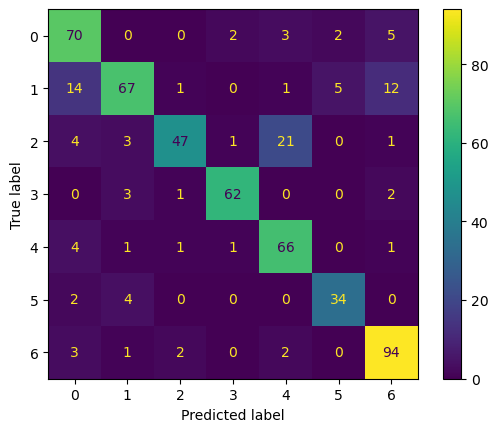

In [134]:

y_pred_prob = model.predict(x_test)

def convert_prob(y_pred_prob, threshold=0.5):
  y_pred_one_hot = np.where(y_pred_prob >= threshold, 1, 0)
  return y_pred_one_hot

y_pred_one_hot = convert_prob(y_pred_prob, threshold=0.5)
y_pred = np.argmax(y_pred_one_hot, axis = 1)
y_true = np.argmax(y_test, axis = 1)
z = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true, y_pred))
z.plot()
plt.show()

In [136]:
accuracy_score(y_true, y_pred)

0.8103130755064457